In [1]:
import pandas as pd
import numpy
import nltk
#nltk.download()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from os import listdir, chdir
from os.path import isfile, join


In [3]:
mypath = r'C:\Users\60250\Desktop\AI\project_LIU-Man\datasets'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

df = pd.read_csv(join(mypath, onlyfiles[0]),names=['Article'],sep='\t',encoding='utf-8')

for f in onlyfiles[1:30]:
    #print(join(mypath, f))
    df_news_temp = pd.read_csv(join(mypath, f),names=['Article'],sep='\t',encoding='utf-8')
    df = df.append(df_news_temp,ignore_index = True)

df = df.reset_index(drop=True)

df['Type'] = ['media',
            'business',
            'entertainment',
            'tech',
            'health',
            'style',
            'travel',
            'sports',
            'sports',
            'sports',
            'sports',
            'sports',
            'sports',
            'business',
            'media',
            'entertainment',
            'entertainment',
            'media',
            'health',
            'health',           
            'travel',
            'travel',
            'style',
            'style',
            'sports',
            'business',
            'tech',
            'business',
            'health',
            'entertainment']

df['Title'] = [ 'HBO Max is finally available on Amazon Fire TV',
              'Nike ad sparks debate about racism in Japan and some calls for a boycott',
              'Drake is selling a scented candle that smells like... Drake',
              'India bans more Chinese apps as tensions remain high',
              'A sedentary Covid-19 lockdown can impact health in just 2 weeks',
              'Model Halima Aden quits runway citing pressure to compromise religious beliefs',
              'Now there is another problem for aviation: wasps',
              'Argentine authorities raid the home and office of Diego Maradonas psychiatrist',
              'Naples mourns Diego Maradona as his former club bids to rename the stadium in his honor',
              'Can Mick Schumacher emulate his father Michael in Formula One?',
              'Jon Rahm searches for magic formula to win debut major',
              'League of Legends is growing. Traditional sports better watch out.',
              'How ski fitness can help you im',
              'English whisky? A spirits pioneer tries to survive the pandemic and Brexit',
              'Fox News Maria Bartiromo gave Trump his first TV interview since the election. It was filled with lies',
              'Move over, Rudolph: Streaming adds to the flood of holiday specials',
              'Selena: The Series sings nostalgia... slowly',
              'Bill Barr bashed in right-wing media after election fraud comments: He is either a liar or a fool or both',
              '911 emergency medical system in US at a breaking point, ambulance group says',
              'A sedentary Covid-19 lockdown can impact health in just 2 weeks',
              'A short history of American food (whatever that is)',
              'Throwback digs, safely distanced: A travel trailer vacation revival',
              'Can antimicrobial fashion protect you from the coronavirus?',
              'Auction offers chance to get up close and personal with the Mona Lisa',
              'Anthony Davis, Lakers Finalizing 5-Year, $190M Max Contract in 2020 Free Agency',
              'Threat to remove Chinese firms from Wall Street is now on Trumps desk',
              'Amazons Panorama box lets firms check if staff follow coronavirus rules',
              'EasyJet to charge for overhead luggage lockers',
              'Covid vaccine: Moderna seeks approval in US and Europe',
              'Foals keyboardist Edwin says tour differently to help climate']

df

,Article,Type,Title
0,"New York (CNN Business)It took a while, but HB...",media,HBO Max is finally available on Amazon Fire TV
1,Hong Kong (CNN Business)A new video advertisem...,business,Nike ad sparks debate about racism in Japan an...
2,(CNN)Wanna make your house smell like Drake? N...,entertainment,Drake is selling a scented candle that smells ...
3,Hong Kong (CNN Business)India has banned dozen...,tech,India bans more Chinese apps as tensions remai...
4,The couch is part of our sedentary lockdown li...,health,A sedentary Covid-19 lockdown can impact healt...
5,Muslim model Halima Aden is stepping back from...,style,Model Halima Aden quits runway citing pressure...
6,"Brisbane, Australia (CNN) — A tiny insect that...",travel,Now there is another problem for aviation: wasps
7,(CNN)Argentine authorities raided the home and...,sports,Argentine authorities raid the home and office...
8,(CNN)Fans flocked to Italian football club Nap...,sports,Naples mourns Diego Maradona as his former clu...
9,(CNN)Towards the end of 2019 the pressure on M...,sports,Can Mick Schumacher emulate his father Michael...


In [4]:
Article = df.Article.values.tolist()
print(Article[5])

Muslim model Halima Aden is stepping back from fashion and quitting runway shows entirely after feeling pressured to compromise her religious beliefs, she announced Wednesday. Aden, the first model to wear a hijab and burkini in the Sports Illustrated swimsuit issue, posted a series of Instagram Stories describing the difficulties she has faced in the "toxic mess called fashion." In the posts, she recounted skipping prayers, wearing clothes she wasn't comfortable in and styling her hijab in ways she felt betrayed her values. "They could call me tomorrow and not even for $10 million would I ever risk compromising my hijab ever again," she wrote. Aden also pledged to never take part in runway shows or travel for fashion months again, adding that "that's where all the bad energy came from." Aden, who lived in a Kenyan refugee camp before moving to the United States, has broken numerous boundaries in her modeling career. She was the first hijab-wearing woman to appear on the cover of Briti

In [5]:
Article_study = []
for line in Article:
    current_segment = word_tokenize(line)
    if len(current_segment)> 1 and current_segment != '\r\n\s':
        Article_study.append(current_segment)
Article_study[0]

['New',
 'York',
 '(',
 'CNN',
 'Business',
 ')',
 'It',
 'took',
 'a',
 'while',
 ',',
 'but',
 'HBO',
 'Max',
 'is',
 'finally',
 'available',
 'on',
 'Amazon',
 'Fire',
 'TV.The',
 'new',
 'streaming',
 'service',
 'will',
 'be',
 'on',
 'Amazon',
 'Fire',
 'devices',
 'starting',
 'Tuesday',
 ',',
 'WarnerMedia',
 'announced',
 'Monday.HBO',
 'Max',
 'is',
 'the',
 'focal',
 'point',
 'of',
 'WarnerMedia',
 "'s",
 'entertainment',
 'empire',
 ',',
 'so',
 'adding',
 'Amazon',
 'Fire',
 'TV',
 'as',
 'a',
 'distributor',
 'is',
 'a',
 'big',
 'deal',
 '.',
 'Fire',
 'TV',
 'has',
 'more',
 'than',
 '40',
 'million',
 'monthly',
 'active',
 'users',
 ',',
 'which',
 'is',
 'more',
 'than',
 'Comcast',
 "'s",
 'Xfinity',
 'service',
 'and',
 'puts',
 'it',
 'in',
 'the',
 'same',
 'range',
 'as',
 'streaming-device',
 'leader',
 'Roku',
 '.',
 '(',
 'WarnerMedia',
 'is',
 'also',
 'the',
 'parent',
 'company',
 'of',
 'CNN',
 '.',
 ')',
 'HBO',
 'Max',
 'has',
 'notched',
 '8.6',
 'mi

In [6]:
df_Article = pd.DataFrame({'Article_study':Article_study})

df_Article

,Article_study
0,"[New, York, (, CNN, Business, ), It, took, a, ..."
1,"[Hong, Kong, (, CNN, Business, ), A, new, vide..."
2,"[(, CNN, ), Wan, na, make, your, house, smell,..."
3,"[Hong, Kong, (, CNN, Business, ), India, has, ..."
4,"[The, couch, is, part, of, our, sedentary, loc..."
5,"[Muslim, model, Halima, Aden, is, stepping, ba..."
6,"[Brisbane, ,, Australia, (, CNN, ), —, A, tiny..."
7,"[(, CNN, ), Argentine, authorities, raided, th..."
8,"[(, CNN, ), Fans, flocked, to, Italian, footba..."
9,"[(, CNN, ), Towards, the, end, of, 2019, the, ..."


In [7]:
stopWords = set(stopwords.words('english'))
stopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
def drop_stopwords(Articles,stopwords):
    Article_clean = []
    all_words = []
    for line in Articles:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        Article_clean.append(line_clean)
    return Article_clean,all_words
Articles = df_Article.Article_study.values.tolist()
stopwords = stopWords
Article_clean,all_words = drop_stopwords(Articles,stopwords)

df_Article = pd.DataFrame({'Article_clean':Article_clean})
df_Article

,Article_clean
0,"[New, York, (, CNN, Business, ), It, took, ,, ..."
1,"[Hong, Kong, (, CNN, Business, ), A, new, vide..."
2,"[(, CNN, ), Wan, na, make, house, smell, like,..."
3,"[Hong, Kong, (, CNN, Business, ), India, banne..."
4,"[The, couch, part, sedentary, lockdown, lifest..."
5,"[Muslim, model, Halima, Aden, stepping, back, ..."
6,"[Brisbane, ,, Australia, (, CNN, ), —, A, tiny..."
7,"[(, CNN, ), Argentine, authorities, raided, ho..."
8,"[(, CNN, ), Fans, flocked, Italian, football, ..."
9,"[(, CNN, ), Towards, end, 2019, pressure, Mick..."


In [9]:
df_all_words = pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,New
1,York
2,(
3,CNN
4,Business


In [10]:
import numpy as np
words_count = df_all_words.groupby('all_words')['all_words'].agg({"count", numpy.size})
words_count = words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

,all_words,size,count
35,",",1338,1338
38,.,1038,1038
1440,``,370,370
4,'',337,337
29,'s,315,315


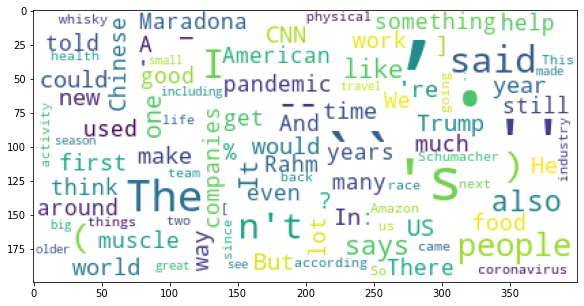

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(10.0,5.0)
wordcloud=WordCloud(background_color="white",max_font_size=80)
word_frequence={x[0]:x[1]for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

In [12]:
#TF IDF
import jieba
import jieba.analyse
from rake_nltk import Rake
r = Rake()
index = 0
print(df['Article'][index])
#Article_study_str="".join(Article_study[index])
#print(" ".join(r.extract_keywords_from_text(Article_study_str)))



New York (CNN Business)It took a while, but HBO Max is finally available on Amazon Fire TV.The new streaming service will be on Amazon Fire devices starting Tuesday, WarnerMedia announced Monday.HBO Max is the focal point of WarnerMedia's entertainment empire, so adding Amazon Fire TV as a distributor is a big deal. Fire TV has more than 40 million monthly active users, which is more than Comcast's Xfinity service and puts it in the same range as streaming-device leader Roku. (WarnerMedia is also the parent company of CNN.) HBO Max has notched 8.6 million activations since it launched in May, despite not being available on Amazon (AMZN) Fire TV and Roku (ROKU) devices. Making a deal with Amazon Fire TV should help HBO Max reach more potential subscribers and allow it to compete with Netflix (NFLX) and Disney , which dominate the streaming market and are both available on Amazon Fire TV and Roku. Although WarnerMedia announced a deal with Amazon, it did not mention any impending deal wi

In [13]:
#LDA model
from gensim import corpora,models,similarities
import gensim
dictionary = corpora.Dictionary(Article_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in Article_clean]
lda = gensim.models.ldamodel.LdaModel(corpus = corpus,id2word = dictionary,num_topics = 6)
print(lda.print_topic(1,topn=7))

0.026*"," + 0.015*"." + 0.010*"``" + 0.008*"''" + 0.006*"'s" + 0.006*"The" + 0.005*")"


In [16]:
for topic in  lda.print_topics(num_topics = 6,num_words = 7):
    print(topic[1])

0.039*"," + 0.029*"." + 0.022*"``" + 0.014*"'s" + 0.013*"''" + 0.009*"I" + 0.005*"The"
0.026*"," + 0.015*"." + 0.010*"``" + 0.008*"''" + 0.006*"'s" + 0.006*"The" + 0.005*")"
0.049*"," + 0.045*"." + 0.019*"'s" + 0.016*"``" + 0.014*"''" + 0.006*"The" + 0.005*"I"
0.051*"," + 0.033*"." + 0.015*"``" + 0.013*"''" + 0.009*"'s" + 0.007*"The" + 0.005*"n't"
0.031*"," + 0.026*"." + 0.009*"''" + 0.009*"``" + 0.006*"'s" + 0.005*"(" + 0.005*"The"
0.076*"," + 0.059*"." + 0.017*"''" + 0.016*"``" + 0.015*"'s" + 0.007*"The" + 0.006*"said"


In [17]:
df_train = pd.DataFrame({'Article_clean': Article_clean, 'Label': df['Type']})
print(df_train.tail())
print(df_train.Label.unique())

                                        Article_clean          Label
25  [Hong, Kong, (, CNN, Business, ), The, US, gov...       business
26  [Amazon, plans, sell, companies, way, detect, ...           tech
27  [EasyJet, customers, want, use, overhead, lugg...       business
28  [Moderna, filing, US, European, emergency, reg...         health
29  [Foals, keyboardist, Edwin, Congrave, said, qu...  entertainment
['media' 'business' 'entertainment' 'tech' 'health' 'style' 'travel'
 'sports']


In [18]:
tag = {"sports": 1,
                 "business": 2,
                 "health": 3,
                 "entertainment": 4,
                 "tech": 5,
                 "travel": 6,
                 "style": 7,
                 "media": 8}
df_train['Label'] = df_train['Label'].map(tag) 
print(df_train.head())


                                       Article_clean  Label
0  [New, York, (, CNN, Business, ), It, took, ,, ...      8
1  [Hong, Kong, (, CNN, Business, ), A, new, vide...      2
2  [(, CNN, ), Wan, na, make, house, smell, like,...      4
3  [Hong, Kong, (, CNN, Business, ), India, banne...      5
4  [The, couch, part, sedentary, lockdown, lifest...      3


In [49]:
def create_word(data):
    words = []
    for index in range(len(data)):
        try:
            words.append( ' '.join(data[index]))
        except Exception:
            print(index)
    return words

from sklearn.model_selection import train_test_split
train_a, test_a, train_b, test_b = train_test_split(df_train['Article_clean'].values, df_train['Label'].values, random_state = 1)
#method random_state is to keep the random seed unchanged
train_word = create_word(train_a)
test_word = create_word(test_a)
test_word[7]

"Hong Kong ( CNN Business ) India banned dozens Chinese apps , drawing rebuke Beijing straining already tense relations world 's populous countries . `` We firmly oppose Indian side 's repeated use 'national security ' excuse prohibit mobile apps Chinese background , '' Ji Rong , spokesperson China 's embassy India , said Wednesday . The statement followed Indian government 's announcement Tuesday banning 43 apps , many Chinese . Several apps China 's e-commerce giant Alibaba ( BABA ) , including shopping platform AliExpress , workplace messaging tool DingTalk streaming site Taobao Live , list . Alibaba immediately respond request comment . Dating apps also hit ban . `` This action taken based inputs regarding apps engaging activities prejudicial sovereignty integrity India , defense India , security state public order , '' India 's Ministry Electronics Information Technology said statement . In response , Chinese embassy said Beijing always required Chinese companies operating oversea

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word', max_features = 4000, lowercase = False)
vectorizer.fit(train_word)

class_news = MultinomialNB()
class_news.fit(vectorizer.transform(train_word),train_b)
prediction = class_news.predict(vectorizer.transform(test_word))
prediction


array([1, 1, 1, 3, 2, 1, 2, 2], dtype=int64)

In [51]:
#class_news.score(vectorizer.transform(test_word), test_b)
print('test_word_sorce',class_news.score(vectorizer.transform(test_word), test_b))
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(test_b, prediction))
print("Recall score: ", recall_score(test_b, prediction, average = 'weighted'))
print("Precision score: ", precision_score(test_b, prediction, average = 'weighted'))
print("F1 score: ", f1_score(test_b, prediction, average = 'weighted'))



test_word_sorce 0.25
Accuracy score:  0.25
Recall score:  0.25
Precision score:  0.15625
F1 score:  0.175


D:\Program\anaconda\python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program\anaconda\python\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:

df_test = pd.DataFrame()
df_test['Article'] = test_word
df_test['Label'] = prediction
tag = {1: "sports",
                 2: "business",
                 3: "health",
                 4: "entertainment",
                 5: "tech",
                 6: "travel",
                 7: "style",
                 8: "media"}
df_test['Label'] = df_test['Label'].map(tag)
df_test['Title'] = ['hbo-max-amazon-fire-tv',
                    'jon-rahm-spain-masters-living-golf-spc-spt-intl',
                    'league-of-legends-esports-growth-spt-intl-cmd',
                    'selena-the-series-review',
                    'amazon-panorama-box',
                    'diego-maradona-naples-mourning-spt-intl',
                    'ski-fitness-training-alpine-edge-spt-intl',
                    'foals-keyboardist-edwin-says']
df_test
df_test.to_csv('test.csv') 

In [34]:
import rdflib
graph_rdf = rdflib.Graph()

is_subclass_of = rdflib.URIRef('http://www.example.org/is_subclass_of')

news1 = rdflib.URIRef('http://www.example.org/hbo-max-amazon-fire-tv')
news2 = rdflib.URIRef('http://www.example.org/nike-japan-racism-ad-intl-hnk')
news3 = rdflib.URIRef('http://www.example.org/drake-candle_entertainment')
news4 = rdflib.URIRef('http://www.example.org/india-bans-chinese-apps-hnk-intl')
news5 = rdflib.URIRef('http://www.example.org/sedentary-lockdown-health-impact-wellness-partnerindex')
news6 = rdflib.URIRef('http://www.example.org/halima-aden-hijab-quits-intl-hnk-scli')
news7 = rdflib.URIRef('http://www.example.org/brisbane-airport-wasps-scn')
news8 = rdflib.URIRef('http://www.example.org/diego-maradona-psychiatrist-agustina-cosachov-spt-intl')


travel = rdflib.URIRef('http://www.example.org/travel')
business = rdflib.URIRef('http://www.example.org/business')
media = rdflib.URIRef('http://www.example.org/media')
sports = rdflib.URIRef('http://www.example.org/sports')
entertainment = rdflib.URIRef('http://www.example.org/entertainment')
health = rdflib.URIRef('http://www.example.org/health')
tech = rdflib.URIRef('http://www.example.org/tech')
style = rdflib.URIRef('http://www.example.org/style')


graph_rdf.add((news1,is_subclass_of,media))
graph_rdf.add((news2,is_subclass_of,business))
graph_rdf.add((news3,is_subclass_of,entertainment))
graph_rdf.add((news4,is_subclass_of,tech))
graph_rdf.add((news5,is_subclass_of,health))
graph_rdf.add((news6,is_subclass_of,style))
graph_rdf.add((news7,is_subclass_of,travel))
graph_rdf.add((news8,is_subclass_of,sports))
  
graph_rdf.serialize("graph.rdf")



In [37]:
graph_rdf = rdflib.Graph()
graph_rdf.parse("graph.rdf", format="xml")  


query_rdf = "select ?relation ?subclass where { <http://www.example.org/hbo-max-amazon-fire-tv> ?relation ?subclass}"
x = graph_rdf.query(query_rdf)
y = list(x) 
print(len(y))  
print(y)


query_rdf = "select ?news ?subclass where {?news <http://www.example.org/is_subclass_of> ?subclass}"
x = graph_rdf.query(query_rdf)
y = list(x)
print(len(y))
print(y)


query_rdf = "select ?news ?relation where {?news ?relation <http://www.example.org/style>}"
x = graph_rdf.query(query_rdf)
y = list(x)
print(len(y))
print(y)


1
[(rdflib.term.URIRef('http://www.example.org/is_subclass_of'), rdflib.term.URIRef('http://www.example.org/media'))]
8
[(rdflib.term.URIRef('http://www.example.org/brisbane-airport-wasps-scn'), rdflib.term.URIRef('http://www.example.org/travel')), (rdflib.term.URIRef('http://www.example.org/hbo-max-amazon-fire-tv'), rdflib.term.URIRef('http://www.example.org/media')), (rdflib.term.URIRef('http://www.example.org/drake-candle_entertainment'), rdflib.term.URIRef('http://www.example.org/entertainment')), (rdflib.term.URIRef('http://www.example.org/sedentary-lockdown-health-impact-wellness-partnerindex'), rdflib.term.URIRef('http://www.example.org/health')), (rdflib.term.URIRef('http://www.example.org/halima-aden-hijab-quits-intl-hnk-scli'), rdflib.term.URIRef('http://www.example.org/style')), (rdflib.term.URIRef('http://www.example.org/nike-japan-racism-ad-intl-hnk'), rdflib.term.URIRef('http://www.example.org/business')), (rdflib.term.URIRef('http://www.example.org/india-bans-chinese-app